In [1]:
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
import numpy as np
import cv2

### Contrast(대비)를 통한 이미지 전처리

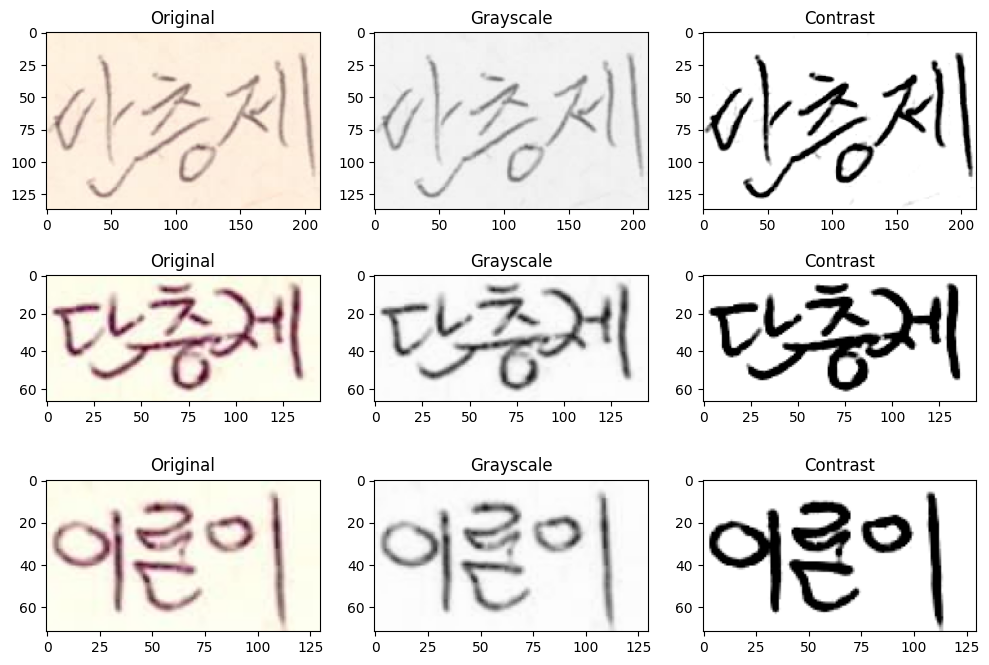

In [2]:
f, ax = plt.subplots(3, 3, figsize=(12, 8))

for idx in range(3):
    img = Image.open("test_image/test{}.png".format(idx+1))
    ax[idx, 0].imshow(img)
    ax[idx,0].set_title("Original")

    g_img = ImageEnhance.Color(img).enhance(0.0)
    ax[idx,1].imshow(g_img)
    ax[idx,1].set_title("Grayscale")

    c_img = ImageEnhance.Contrast(g_img).enhance(5)
    ax[idx,2].imshow(c_img)
    ax[idx,2].set_title("Contrast")

plt.show()

### cv2를 통한 이미지 전처리

In [3]:
def word_object_detection(file_name) :
    src = cv2.imread(file_name)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
    _, bin_img = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
    _, _, stats, _ = cv2.connectedComponentsWithStats(bin_img)
    x, y, w, h, _ = stats[0]
    return bin_img[y:y+h, x:x+w]

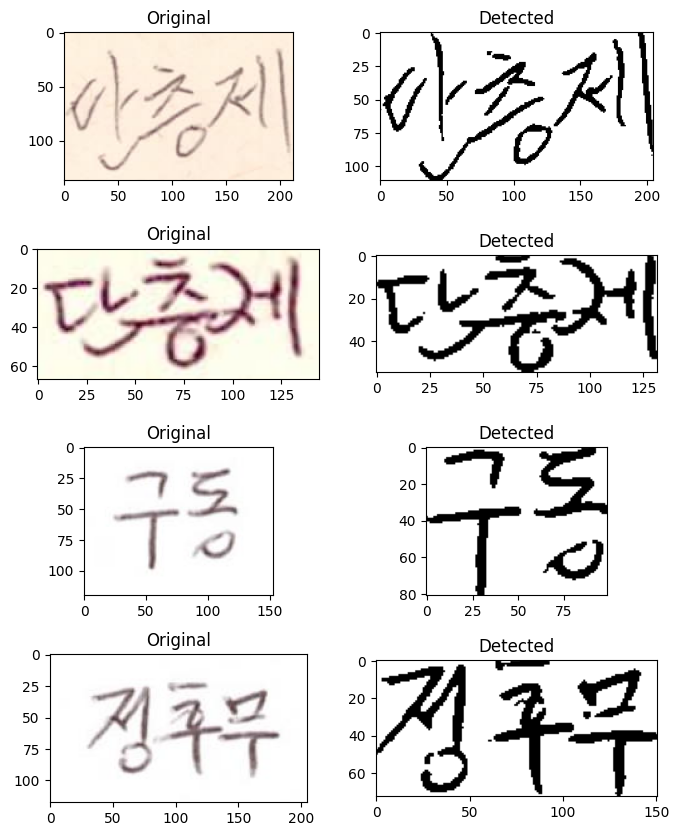

In [4]:
f, ax = plt.subplots(4, 2, figsize=(8, 10))

for idx, file_name in enumerate(["test1.png", "test2.png", "test4.png", "test6.png"]):
    original = Image.open("test_image/"+file_name)
    ax[idx, 0].imshow(original)
    ax[idx, 0].set_title("Original")

    detected = word_object_detection("test_image/"+file_name)
    ax[idx, 1].imshow(detected, cmap="gray")
    ax[idx, 1].set_title("Detected")

plt.subplots_adjust(hspace=0.4)
plt.show()

### 실제 전처리 코드

In [11]:
import os, json

In [12]:
ORIGINAL_IMAGE_PATH = "./Word_Cut_Png/"
PREPROCESSED_IMAGE_PATH = "./Preprocess_Word/"

In [13]:
# Word_Cut_Png 파일에 word_object_detection 함수 적용하여 Preprocess_Word에 저장

for file_name in os.listdir(ORIGINAL_IMAGE_PATH):
    img = word_object_detection(ORIGINAL_IMAGE_PATH+file_name)
    cv2.imwrite(PREPROCESSED_IMAGE_PATH+file_name, img)